<a href="https://colab.research.google.com/github/ahmadbadawikr/DS_and_ML/blob/master/Movie_Review_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/wiki_movie_plot.csv')

df.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


Film akan diklasifikasikan origin/ethnicity -nya berdasarkan plot

In [ ]:
len(df['Origin/Ethnicity'].unique())

24

In [ ]:
df['Origin/Ethnicity'].unique()

array(['American', 'Australian', 'Bangladeshi', 'British', 'Canadian',
       'Chinese', 'Egyptian', 'Hong Kong', 'Filipino', 'Assamese',
       'Bengali', 'Bollywood', 'Kannada', 'Malayalam', 'Marathi',
       'Punjabi', 'Tamil', 'Telugu', 'Japanese', 'Malaysian', 'Maldivian',
       'Russian', 'South_Korean', 'Turkish'], dtype=object)

Hapus beberapa column

In [ ]:
df = df.drop(columns=['Release Year','Title','Director','Cast','Genre','Wiki Page'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34886 entries, 0 to 34885
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Origin/Ethnicity  34886 non-null  object
 1   Plot              34886 non-null  object
dtypes: object(2)
memory usage: 545.2+ KB


In [ ]:
df.describe()

,Origin/Ethnicity,Plot
count,34886,34886
unique,24,33869
top,American,"(マッスル人参争奪！超人大戦争, Massuru Ninjin Soudatsu! Chou..."
freq,17377,6


In [ ]:
df['Origin/Ethnicity'].value_counts()

American        17377
British          3670
Bollywood        2931
Tamil            2599
Telugu           1311
Japanese         1188
Malayalam        1095
Hong Kong         791
Canadian          723
Australian        576
South_Korean      522
Chinese           463
Kannada           444
Bengali           306
Russian           232
Marathi           141
Filipino          128
Bangladeshi        87
Punjabi            84
Turkish            70
Malaysian          70
Egyptian           67
Assamese            9
Maldivian           2
Name: Origin/Ethnicity, dtype: int64

Ambil 1000 data di American, British, Bollywood

In [ ]:
USmovies = df.loc[(df['Origin/Ethnicity'] == 'American')].head(2000)
BRmovies = df.loc[(df['Origin/Ethnicity'] == 'British')].head(2000)
BOmovies = df.loc[(df['Origin/Ethnicity'] == 'Bollywood')].head(2000)

In [ ]:
frames = [USmovies, BRmovies, BOmovies]
movies = pd.concat(frames)

In [ ]:
movies.describe()

,Origin/Ethnicity,Plot
count,6000,6000
unique,3,5925
top,Bollywood,Kammo (Nargis) lives a very wealthy lifestyle ...
freq,2000,3


In [ ]:
# fungsi untuk plot cleaning
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    #text = re.sub('\W', ' ', text)
    #text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [ ]:
list(movies['Plot'][7:10])

['The film is about a family who move to the suburbs, hoping for a quiet life. Things start to go wrong, and the wife gets violent and starts throwing crockery, leading to her arrest.',
 'The opening scene shows the interior of the robbers\' den. The walls are decorated with the portraits of notorious criminals and pictures illustrating the exploits of famous bandits. Some of the gang are lounging about, while others are reading novels and illustrated papers. Although of youthful appearance, each is dressed like a typical Western desperado. The "Bandit Queen," leading a blindfolded new recruit, now enters the room. He is led to the center of the room, raises his right hand and is solemnly sworn in. When the bandage is removed from his eyes he finds himself looking into the muzzles of a dozen or more 45\'s. The gang then congratulates the new member and heartily shake his hand. The "Bandit Queen" who is evidently the leader of the gang, now calls for volunteers to hold up a train. All r

In [ ]:
list(movies['Plot'][7:10].apply(clean_text))

['the film is about a family who move to the suburbs, hoping for a quiet life. things start to go wrong, and the wife gets violent and starts throwing crockery, leading to her arrest.',
 'the opening scene shows the interior of the robbers\' den. the walls are decorated with the portraits of notorious criminals and pictures illustrating the exploits of famous bandits. some of the gang are lounging about, while others are reading novels and illustrated papers. although of youthful appearance, each is dressed like a typical western desperado. the "bandit queen," leading a blindfolded new recruit, now enters the room. he is led to the center of the room, raises his right hand and is solemnly sworn in. when the bandage is removed from his eyes he finds himself looking into the muzzles of a dozen or more 45 . the gang then congratulates the new member and heartily shake his hand. the "bandit queen" who is evidently the leader of the gang, now calls for volunteers to hold up a train. all res

In [ ]:
movies['Plot'] = movies['Plot'].apply(clean_text)

In [ ]:
movies

,Origin/Ethnicity,Plot
0,American,"a bartender is working at a saloon, serving dr..."
1,American,"the moon, painted with a smiling face hangs ov..."
2,American,"the film, just over a minute long, is composed..."
3,American,lasting just 61 seconds and consisting of two ...
4,American,the earliest known adaptation of the classic f...
...,...,...
26192,Bollywood,anjali (rimi sen) arrives in mumbai looking fo...
26193,Bollywood,dil (gurline chopra) is getting engaged to abh...
26194,Bollywood,nandini and tina are stepsisters and after the...
26195,Bollywood,rajiv (shahid kapoor) wants to be one of the p...


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 0, 'Origin/Ethnicity')

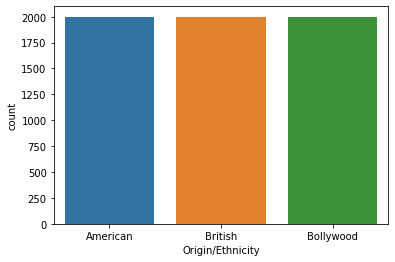

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.countplot(movies['Origin/Ethnicity'])
plt.xlabel('Origin/Ethnicity')

Perfectly Balanced, As all things should be

In [ ]:
origin = pd.get_dummies(movies['Origin/Ethnicity'])
df1 = pd.concat([movies, origin], axis=1)
df1 = df1.drop(columns=['Origin/Ethnicity'])
df1

,Plot,American,Bollywood,British
0,"a bartender is working at a saloon, serving dr...",1,0,0
1,"the moon, painted with a smiling face hangs ov...",1,0,0
2,"the film, just over a minute long, is composed...",1,0,0
3,lasting just 61 seconds and consisting of two ...,1,0,0
4,the earliest known adaptation of the classic f...,1,0,0
...,...,...,...,...
26192,anjali (rimi sen) arrives in mumbai looking fo...,0,1,0
26193,dil (gurline chopra) is getting engaged to abh...,0,1,0
26194,nandini and tina are stepsisters and after the...,0,1,0
26195,rajiv (shahid kapoor) wants to be one of the p...,0,1,0


In [ ]:
plot = df1['Plot'].values
origin = df1[['American', 'British', 'Bollywood']].values

In [ ]:
plot

array(['a bartender is working at a saloon, serving drinks to customers. after he fills a stereotypically irish man  bucket with beer, carrie nation and her followers burst inside. they assault the irish man, pulling his hat over his eyes and then dumping the beer over his head. the group then begin wrecking the bar, smashing the fixtures, mirrors, and breaking the cash register. the bartender then sprays seltzer water in nation  face before a group of policemen appear and order everybody to leave.[1]',
       'the moon, painted with a smiling face hangs over a park at night. a young couple walking past a fence learn on a railing and look up. the moon smiles. they embrace, and the moon  smile gets bigger. they then sit down on a bench by a tree. the moon  view is blocked, causing him to frown. in the last scene, the man fans the woman with his hat because the moon has left the sky and is perched over her shoulder to see everything better.',
       'the film, just over a minute long, is

In [ ]:
origin

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]], dtype=uint8)

In [ ]:
from sklearn.model_selection import train_test_split
plot_train, plot_test, origin_train, origin_test = train_test_split(plot, origin, test_size=0.2, shuffle=True)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='-')
tokenizer.fit_on_texts(plot_train) 
tokenizer.fit_on_texts(plot_test)
	 
seq_train = tokenizer.texts_to_sequences(plot_train)
seq_test = tokenizer.texts_to_sequences(plot_test)
	 
padded_train = pad_sequences(seq_train, padding='post', maxlen=256,truncating='post') 
padded_test = pad_sequences(seq_test, padding='post',maxlen=256,truncating='post')

word_to_index = tokenizer.word_index

In [ ]:
padded_test.shape, origin_test.shape

((1200, 256), (1200, 3))

In [ ]:
padded_train.shape, origin_train.shape

((4800, 256), (4800, 3))

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=32),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          160000    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               82432     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 9

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'Adam',
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping

early_stopping_monitor = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 8,
                          verbose = 1,
                          restore_best_weights = True)

In [ ]:
hist = model.fit(padded_train,origin_train,steps_per_epoch=25,epochs=50,validation_data=(padded_test, origin_test),validation_steps=5,verbose=1)

Epoch 1/50
25/25 [==============================] - 23s 939ms/step - loss: 1.0988 - accuracy: 0.3354 - val_loss: 1.0995 - val_accuracy: 0.3217
Epoch 2/50
25/25 [==============================] - 24s 957ms/step - loss: 1.0939 - accuracy: 0.3669 - val_loss: 1.0937 - val_accuracy: 0.3675
Epoch 3/50
25/25 [==============================] - 24s 942ms/step - loss: 1.0737 - accuracy: 0.4212 - val_loss: 0.8362 - val_accuracy: 0.5833
Epoch 4/50
25/25 [==============================] - 23s 925ms/step - loss: 1.0294 - accuracy: 0.4815 - val_loss: 0.8847 - val_accuracy: 0.6167
Epoch 5/50
25/25 [==============================] - 23s 919ms/step - loss: 0.8385 - accuracy: 0.5750 - val_loss: 1.0192 - val_accuracy: 0.4583
Epoch 6/50
25/25 [==============================] - 23s 909ms/step - loss: 0.9165 - accuracy: 0.5458 - val_loss: 0.8154 - val_accuracy: 0.5700
Epoch 7/50
25/25 [==============================] - 23s 911ms/step - loss: 0.8194 - accuracy: 0.5869 - val_loss: 0.8638 - val_accuracy: 0.5467